In [10]:
from CLogDKPd import CLogDKPd_MGE, CLogDKPd_MGmB, CLogDKPd_MGE_Ordenado, sigmoid, sinal
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filtrar dataset apenas para digito de 0 a 4
train_filter = np.where(y_train < 2)
test_filter = np.where(y_test < 2)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

In [3]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

x_train, y_train = select_first_n_per_class(x_train, y_train, 200)
x_test, y_test = select_first_n_per_class(x_test, y_test, 200)

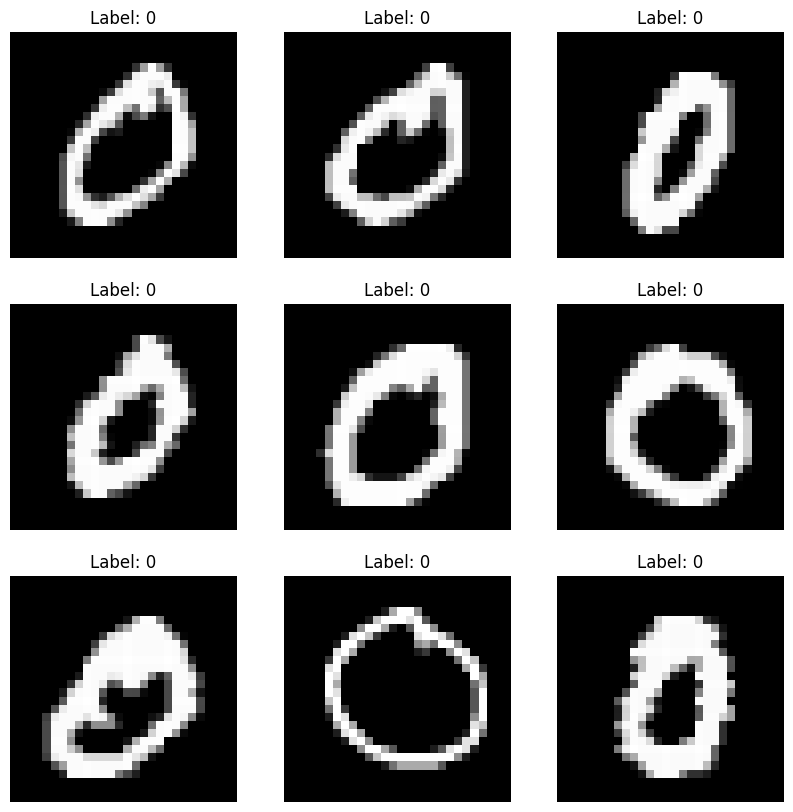

In [4]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()


plot_images(x_train, y_train)

In [5]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

X shape: (400, 784)


In [14]:
eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 25
alpha, E = CLogDKPd_MGmB(x_train, y_train, alpha, eta, epochs, d, batch_size)

c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLogDKPd.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLogDKPd.py:24: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLogDKPd.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-2.11205352e+13 -2.39434172e+13 -1.65924517e+13 -2.20924394e+13
 -3.34592108e+13 -2.67472486e+13 -2.84791103e+13 -6.16414367e+12
 -2.42262034e+13 -1.84252902e+13 -2.22115974e+13 -1.87212717e+13
 -2.47795747e+13 -9.87069153e+12 -2.97615544e+13 -1.28049259e+13
 -3.31115638e+13 -2.89610211e+13 -1.54075461e+13 -2.14692203e+13
 -1.99848498e+13 -2.03138091e+13 -2.37332217e+13 -5.11342648e+12
 -8.70195030e+12 -2.07852656e+13 -4.06192390e+12 -1.34566285e+13
 -5.14520672e+12 -1.77014812e+13 -3.79784633e+12 -3.13754953e+13
 -3.60515486e+13 -1.93401979e+13 -3.51290450e+13 -1.96354664e+13
 -1.68215194e+13 -2.29404584e+13 -3.61931525e+13 -4.34542310e+13
 -3.35024793e+13 -2.69360300e+13 -2.33481112e+13 -2.07565766e+13
 -1.93109552e+13 -2.88753986e+13 -3.17868852e+13 -2.05121640e+13
 -1.95935380e+13 -1.23062326e+13 -2.93694771e+13 -1.58197927e+13
 -2.84348645e+13 -9.20160567e+12 -1.88248228e+13 -2.57958252e+13
 -1.14855080e+13 -1.87995982e+13 -1.65271348e+13 -1.66421416e+13
 -1.65107183e+13 -2.54262

In [15]:
A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0


In [16]:
from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

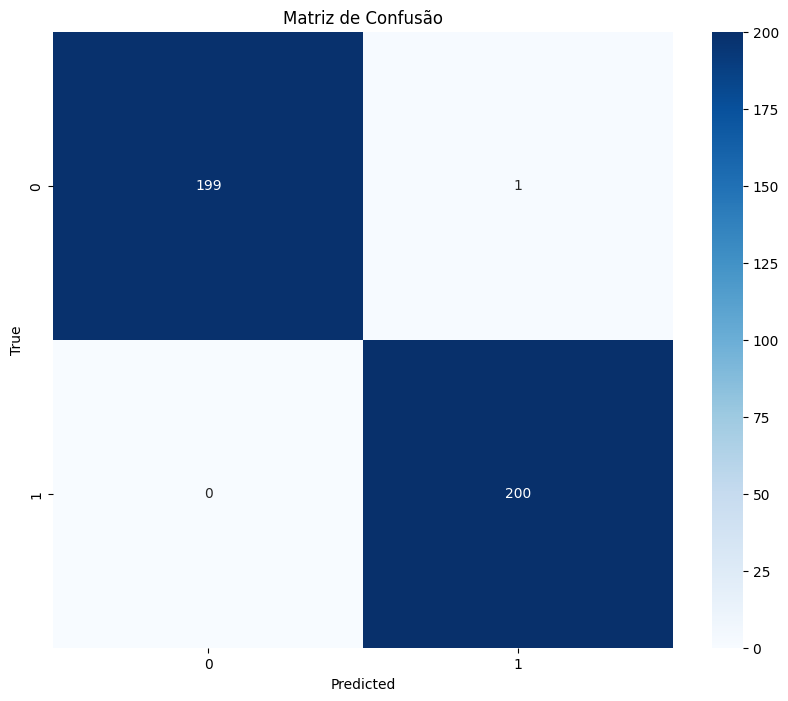

In [17]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

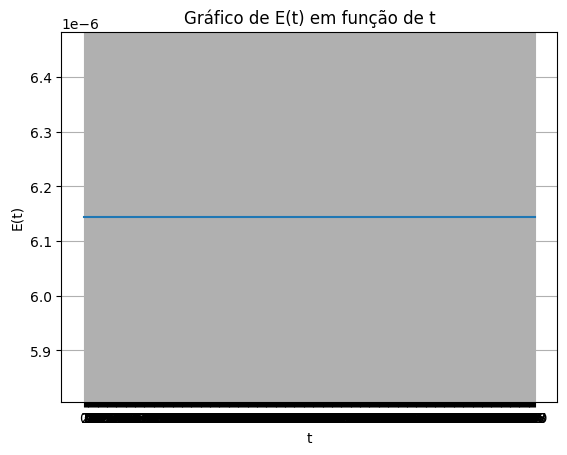

In [18]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [26]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 2000
alpha = np.zeros(len(X))
d=2
alpha, E = CLogDKPd_MGE_Ordenado(X, Y, alpha, eta, epochs, d)
print(alpha)

[ 6.90702547 -5.03556118 -4.91297779  4.02503407]


In [27]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))

0.7278062164600037
1
0.11424847815962487
0
0.1570543467644276
0
0.9657155103313495
1


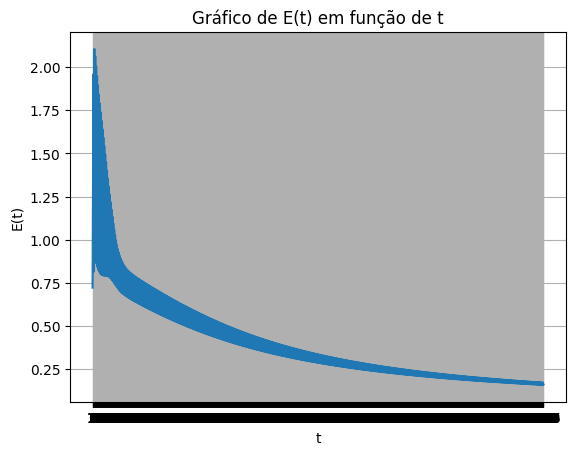

In [28]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()